## Charger et Nettoyer les Données

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("train.csv", header=None)

# Extraire les en-têtes
df.columns = df.iloc[0]
df = df.drop(index=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 1 to 3228
Data columns (total 78 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gene Description                    3228 non-null   object 
 1   Gene Accession Number               3227 non-null   object 
 2   1.0                                 3227 non-null   float64
 3   call                                3227 non-null   object 
 4   2.0                                 3227 non-null   float64
 5   call                                3227 non-null   object 
 6   3.0                                 3227 non-null   float64
 7   call                                3227 non-null   object 
 8   4.0                                 3227 non-null   float64
 9   call                                3227 non-null   object 
 10  5.0                                 3227 non-null   float64
 11  call                                3227 no

## Supprimer colonnes catégorielles (call, Gene Description, etc.)

In [7]:
cols_to_drop = [col for col in df.columns if 'call' in str(col) or 'Gene' in str(col)]
df_numeric = df.drop(columns=cols_to_drop)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 1 to 3228
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1.0     3227 non-null   float64
 1   2.0     3227 non-null   float64
 2   3.0     3227 non-null   float64
 3   4.0     3227 non-null   float64
 4   5.0     3227 non-null   float64
 5   6.0     3227 non-null   float64
 6   7.0     3227 non-null   float64
 7   8.0     3227 non-null   float64
 8   9.0     3227 non-null   float64
 9   10.0    3227 non-null   float64
 10  11.0    3227 non-null   float64
 11  12.0    3227 non-null   float64
 12  13.0    3227 non-null   float64
 13  14.0    3227 non-null   float64
 14  15.0    3227 non-null   float64
 15  16.0    3227 non-null   float64
 16  17.0    3227 non-null   float64
 17  18.0    3227 non-null   float64
 18  19.0    3227 non-null   float64
 19  20.0    3227 non-null   float64
 20  21.0    3227 non-null   float64
 21  22.0    3227 non-null   float64
 22  

## Standardiser

In [8]:
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
df_numeric.dropna(axis=0, inplace=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

## Clustering Hiérarchique

In [12]:
linked = linkage(X_scaled, method='ward')
n_clusters = 2
cluster_labels_hier = fcluster(linked, n_clusters, criterion='maxclust')

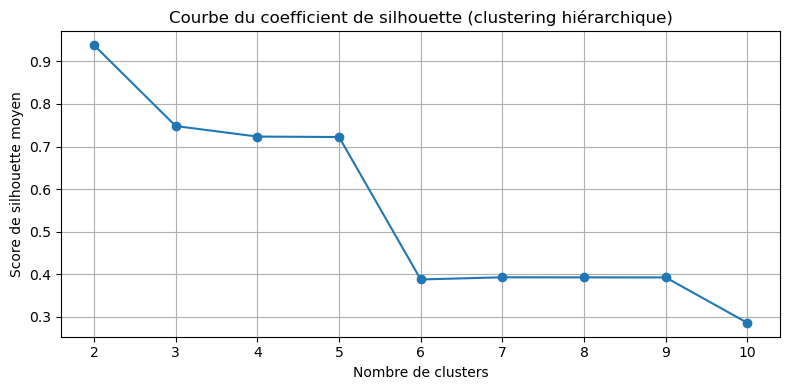

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)  

for k in K:
    labels = fcluster(linked, k, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Courbe du coefficient de silhouette (clustering hiérarchique)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette moyen')
plt.grid(True)
plt.tight_layout()
plt.show()


## Dendrogramme hiérarchique

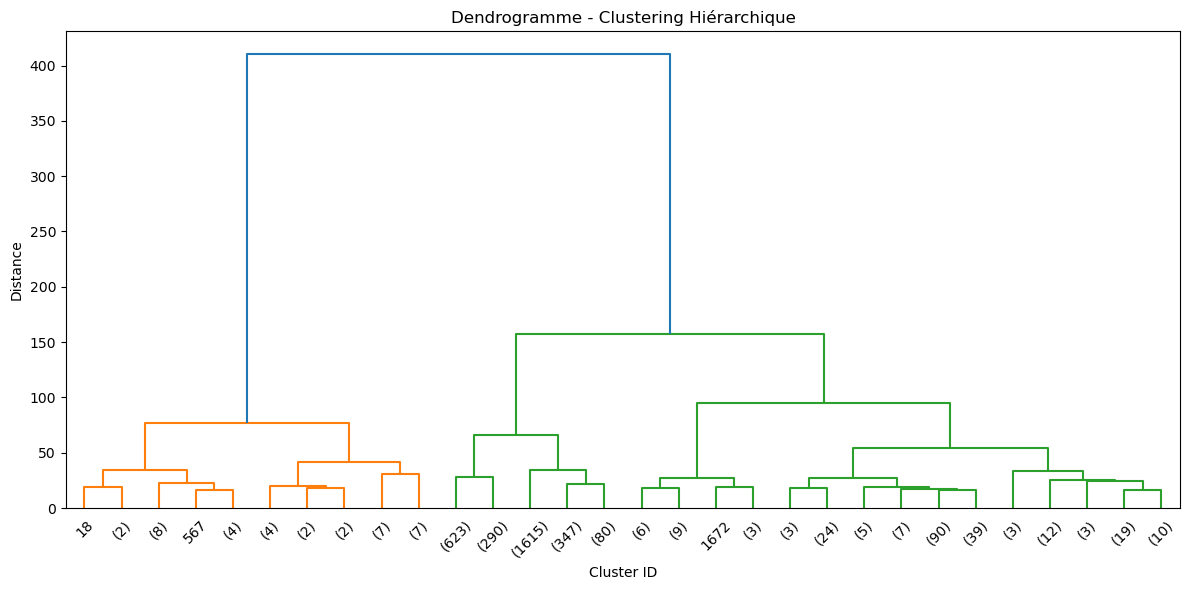

In [14]:
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title("Dendrogramme - Clustering Hiérarchique")
plt.xlabel("Cluster ID")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

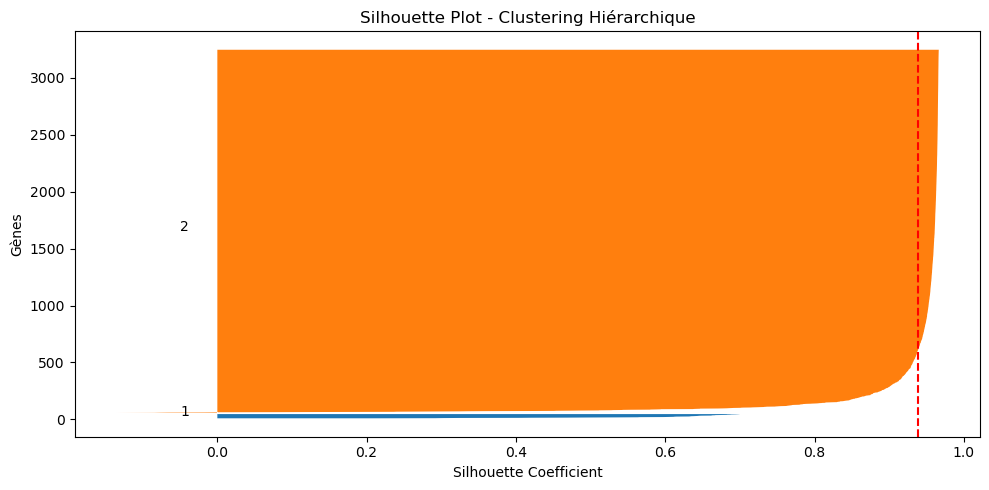

In [26]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Calcul du score de silhouette moyen
silhouette_avg_hier = silhouette_score(X_scaled, cluster_labels_hier)

# Calcul des scores de silhouette individuels pour chaque point
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels_hier)

# Visualisation des résultats
plt.figure(figsize=(10, 5))
y_lower = 10

# Visualisation du score de silhouette pour chaque cluster
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_hier == i + 1]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
    y_lower = y_upper + 10

# Ligne rouge représentant la moyenne du score de silhouette
plt.axvline(x=silhouette_avg_hier, color="red", linestyle="--")

# Paramètres du graphique
plt.title("Silhouette Plot - Clustering Hiérarchique")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Gènes")
plt.tight_layout()
plt.show()


In [29]:
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels_hier)

# Initialisation d'une liste pour stocker les scores moyens par cluster
silhouette_scores_by_cluster = []

# Calcul du score moyen de silhouette pour chaque cluster
for i in range(n_clusters):
    # Extraire les valeurs de silhouette pour les points appartenant au cluster i
    cluster_silhouette_values = sample_silhouette_values[cluster_labels_hier == i + 1]
    # Calcul de la moyenne des scores de silhouette pour ce cluster
    cluster_score = cluster_silhouette_values.mean()
    silhouette_scores_by_cluster.append(cluster_score)
    
print(silhouette_scores_by_cluster)


[0.5857322656266186, 0.9420712076192251]


In [23]:
print(f"Silhouette Score (Hiérarchique): {silhouette_avg_hier:.4f}")

Silhouette Score (Hiérarchique): 0.9379


## Scatter plot

Text(0.5, 1.0, 'Projection PCA - Clustering Hiérarchique')

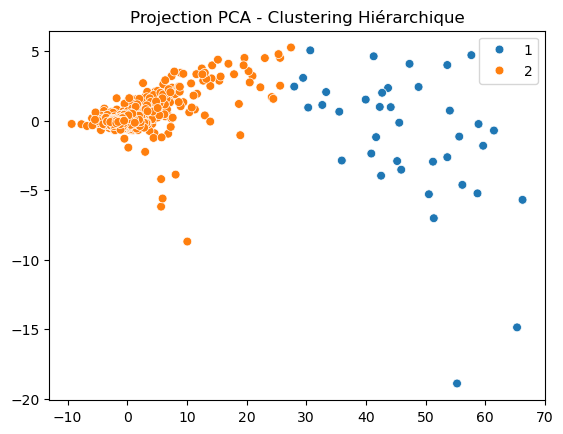

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.subplot()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_hier, palette='tab10', s=40)
plt.title("Projection PCA - Clustering Hiérarchique")

## K-means

In [21]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_scaled)

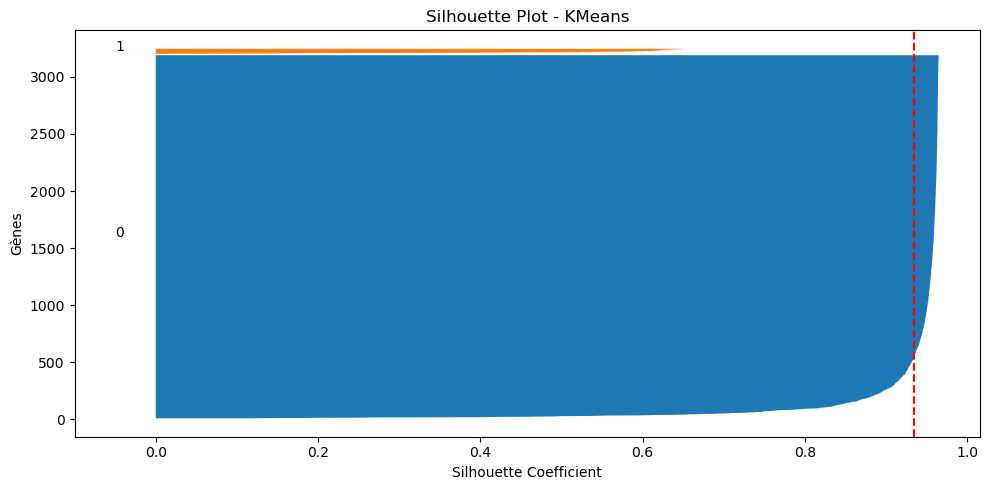

In [22]:

silhouette_avg_kmeans = silhouette_score(X_scaled, cluster_labels_kmeans)
sample_silhouette_values_kmeans = silhouette_samples(X_scaled, cluster_labels_kmeans)

plt.figure(figsize=(10, 5))
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values_kmeans[cluster_labels_kmeans == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg_kmeans, color="red", linestyle="--")
plt.title("Silhouette Plot - KMeans")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Gènes")
plt.tight_layout()
plt.show()


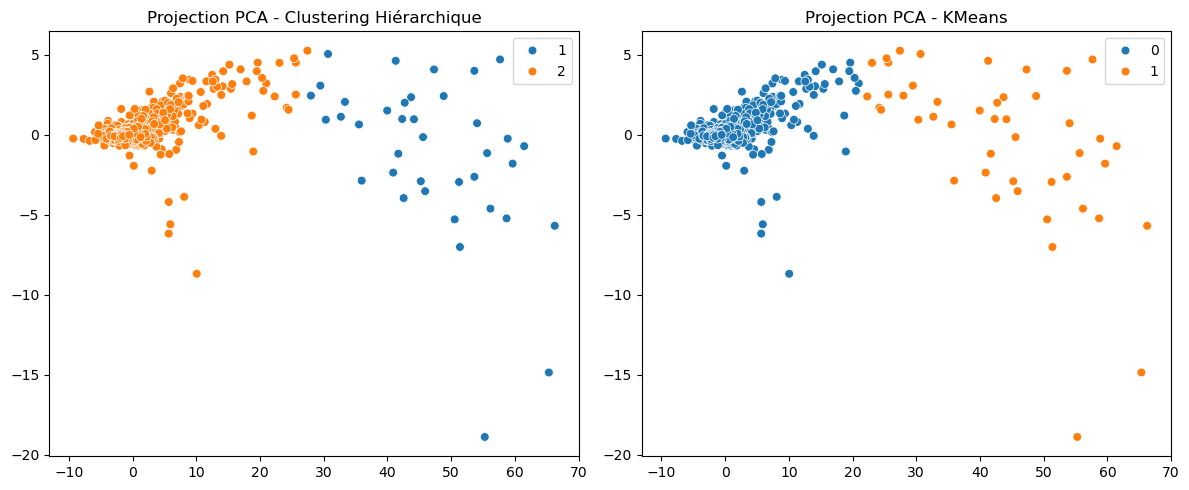

Silhouette Score (Hiérarchique): 0.9379
Silhouette Score (KMeans): 0.9346


In [ ]:
plt.figure(figsize=(12, 5))

# Clustering hiérarchique
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_hier, palette='tab10', s=40)
plt.title("Projection PCA - Clustering Hiérarchique")

# KMeans
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_kmeans, palette='tab10', s=40)
plt.title("Projection PCA - KMeans")

plt.tight_layout()
plt.show()

# Affichage des scores de silhouette
print(f"Silhouette Score (Hiérarchique): {silhouette_avg_hier:.4f}")
print(f"Silhouette Score (KMeans): {silhouette_avg_kmeans:.4f}")